In [1]:
# !pip install pandas
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import pylab
import statistics as st

  Using cached pandas-2.0.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)


In [2]:
#loading the data

aqe = pd.read_csv(r"aqe.csv", skiprows=0)
aqe_r = pd.read_csv(r"aqe_r.csv", skiprows=0)
aqe2_r = pd.read_csv(r"aqe2.csv", skiprows=0)
redq = pd.read_csv(r"redq.csv", skiprows=0)
redq_r = pd.read_csv(r"redq_r.csv", skiprows=0)
sac = pd.read_csv(r"sac.csv", skiprows=0)
sac_r = pd.read_csv(r"sac_r.csv", skiprows=0)
aqe2 = pd.read_csv(r"aqe2.csv", skiprows=0)
acch = pd.read_csv(r"acch.csv", skiprows=0)
acc = pd.read_csv(r"acc.csv", skiprows=0)
acc2 = pd.read_csv(r"acc2_75k.csv", skiprows=0)

#trying out stuff
# print(aqe)
# print(aqe_r)
# print(redq)
# print(sac_r)
aqe_step = np.array(aqe['step'])
aqe_al = np.array(aqe["actor_loss"])
print(aqe_step)
print(aqe_al)
# len(aqe_step)
# len(aqe_al)
# plt.figure(1)
# plt.plot(aqe_step, aqe_al, label = "aqe")

[     0    100    200 ... 349500 349600 349700]
[ 0.          0.9754937   1.79349545 ... -2.01689072 -1.97444274
 -1.99426454]


In [3]:
#convert str to float
sac.update(sac[['actor_entropy', 'actor_loss', 'actor_target_entropy', 'alpha_loss', 'alpha_value', 'batch_reward', 'critic_loss', 'step']].astype(float))
redq.update(redq[['actor_entropy', 'actor_loss', 'actor_target_entropy', 'alpha_loss', 'alpha_value', 'batch_reward', 'critic_loss', 'step']].astype(float))
aqe.update(aqe[['actor_entropy', 'actor_loss', 'actor_target_entropy', 'alpha_loss', 'alpha_value', 'batch_reward', 'critic_loss', 'step']].astype(float))

sac_r.update(sac_r[['env_step', 'episode_reward', 'step']].astype(float))
redq_r.update(redq_r[['env_step', 'episode_reward', 'step']].astype(float))
aqe_r.update(aqe_r[['env_step', 'episode_reward', 'step']].astype(float))

aqe2.update(aqe2[['env_step', 'episode_reward', 'step']].astype(float))
acch.update(acch[['adjusted_Q_drop', 'dropped_Q', 'env_step', 'normalized_bias', 'reward', 'step']].astype(float))
acc.update(acc[['adjusted_Q_drop', 'dropped_Q', 'env_step', 'normalized_bias', 'reward', 'step']].astype(float))
acc2.update(acc2[['adjusted_Q_drop', 'dropped_Q', 'env_step', 'normalized_bias', 'reward', 'step']].astype(float))

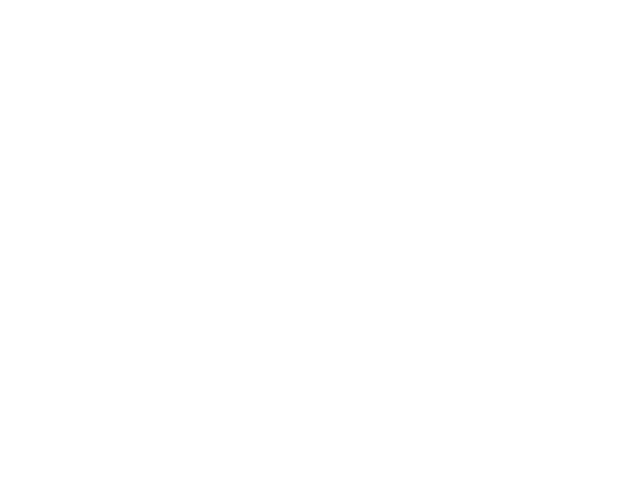

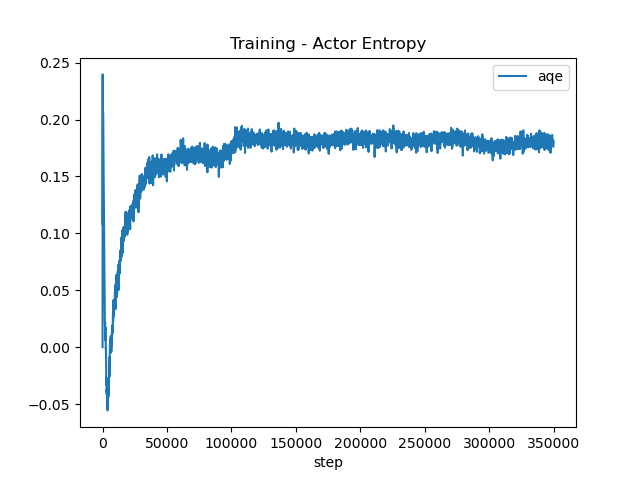

In [4]:
#Actor Entropy
# list(aqe)
# list(aqe_r)
# plt.figure(1)
# x_aqe = aqe['step'].to_numpy()
# ae_aqe = aqe['actor_entropy'].to_numpy()
plt.figure(1)
# # plt.plot(x_aqe, ae_aqe, label = "aqe")
aqe.plot(x='step', y='actor_entropy', label = "aqe")

plt.title("Training - Actor Entropy")
# test: plt.plot(aqe_step, aqe_al, label='test')
# plt.xlabel("Environment Steps")
# plt.ylabel("Actor Entropy")
# redq.plot(x='step', y='actor_entropy', label = "redq")
# sac.plot(x='step', y='actor_entropy', label = "sac")
plt.legend()

In [5]:
# Actor Loss
# list(aqe)
# list(aqe_r)
plt.figure(1)
x_aqe = np.array(aqe['step'])
ae_aqe = np.array(aqe['actor_entropy'])
plt.plot(x_aqe, ae_aqe, label = "aqe")

x_redq = np.array(redq['step'])
ae_redq = np.array(redq['actor_entropy'])
plt.plot(x_redq, ae_redq, label = "redq")

x_sac = np.array(sac['step'])
ae_sac = np.array(sac['actor_entropy'])
plt.plot(x_sac, ae_sac, label = "sac")

# plt.plot(x_aqe, ae_aqe, label = "aqe")
# aqe.plot(x='step', y='actor_loss', label = "aqe")

plt.title("Training - Actor Loss")
plt.xlabel("Environment Steps")
# plt.ylabel("Actor Entropy")
# redq.plot(x='step', y='actor_loss', label = "redq")
# sac.plot(x='step', y='actor_loss', label = "sac")
plt.legend()

In [6]:
acc2t = acc2.iloc[25:]
# print(acc2t)
acc2t.to_csv('acc2t.csv')
acc22 = acc2t.groupby(np.arange(len(acc2t))//10).mean()
acc22['ave_step']=range(2000, (len(acc22.index)+1) * 2000, 2000)
# print(acc22)
acc22.to_csv('acc22.csv')

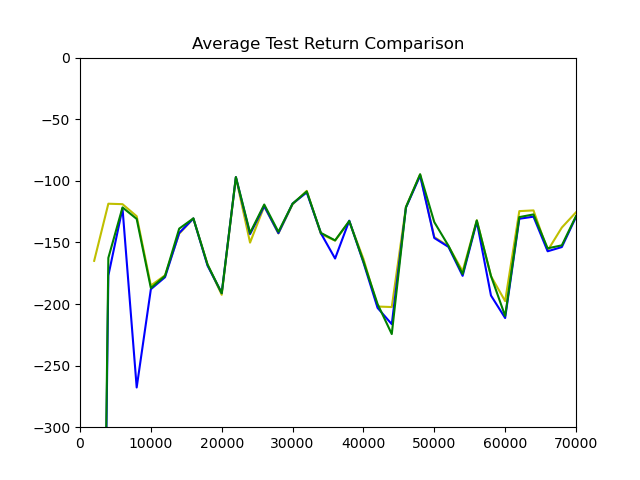

In [7]:
#Reward
plt.figure(10)
# x_aqer = np.array(aqe_r['env_step'])[:, None]
# # x_aqer = aqe_r['env_step'].values#.to_numpy()
# y_aqer = aqe_r['episode_reward'].values#.to_numpy()
# plt.plot(x_aqer, y_aqer, label = "aqe")


# print(acc_es)
# acc.plot(x='env_step', y='reward', label = "acc_results")
# plt.figure(3)
plt.title("Average Test Return Comparison")

## !! for now
# acc_10 = acc.iloc[9::10, :]
# acc_es = np.array(acc_10['env_step'])
# acc_er = np.array(acc_10['reward'])
# print(acc_es)

acc_70 = acc.iloc[25:]
acc11 = acc_70.groupby(np.arange(len(acc_70))//10).mean()
acc11['ave_step']=range(2000, (len(acc11.index)+1) * 2000, 2000)
acc11.to_csv('acc11.csv')
acc_es = np.array(acc11['ave_step'])
acc_er = np.array(acc11['reward'])
# plt.plot(acc_es, acc_er, label = "acc_results")

# acc2t = acc2.iloc[25:]
# acc22 = acc2t.groupby(np.arange(len(acc2t))//10).mean()
# acc22['ave_step']=range(2000, (len(acc22.index)+1) * 2000, 2000)
# acc22.to_csv('acc22.csv')
c2x = np.array(acc22['ave_step'])
c2y = np.array(acc22['reward'])
# plt.plot(c2x, c2y, label = "acc_results")
# plt.plot(c2x, c2y, label = "acc_results")
aqe_es = np.array(aqe_r['env_step'])
aqe_er = np.array(aqe_r["episode_reward"])
plt.plot(aqe_es, aqe_er, label = "Adjusted Dropped Number Estimates", color = 'y')
redq_es = np.array(redq_r['env_step'])
redq_er = np.array(redq_r["episode_reward"])
plt.plot(redq_es, redq_er, label = "Actual Dropped Number", color = 'b')
sac_es = np.array(sac_r['env_step'])
sac_er = np.array(sac_r["episode_reward"])
plt.plot(sac_es, sac_er, label = "Normalized Bias", color = 'g')
# plt.plot
# aqe_r.plot(x='env_step', y='episode_reward', label = "aqe_results")
# plt.title("AQE Episode Reward")
# aqe2_r.plot(x='env_step', y='episode_reward', label = "aqe_results")
# plt.title("AQE Episode Reward")
# redq_r.plot(x='env_step', y='episode_reward', label = "redq_results")
# sac_r.plot(x='env_step', y='episode_reward', label = "sac_results")
pylab.ylim(-300, 0)
pylab.xlim(0, 70000)

pylab.show()
plt.xlabel("Environment Steps")
plt.ylabel("Average Test Return")
# plt.ylabel("Actor Loss")
plt.legend()

[ 2000  4000  6000  8000 10000 12000 14000 16000 18000 20000 22000 24000
 26000 28000 30000 32000 34000 36000 38000 40000 42000 44000 46000 48000
 50000 52000 54000 56000 58000 60000 62000 64000 66000]


Text(0.5, 1.0, 'aqe vs acc')

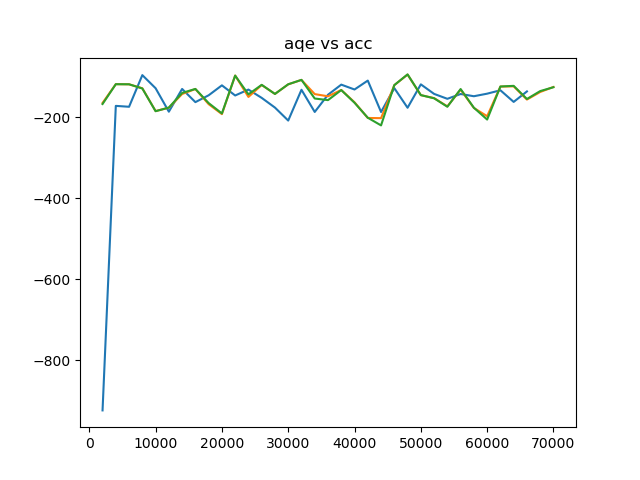

In [8]:
plt.figure(20)
print(acc_es)
plt.plot(acc_es, acc_er, label = "acc_results")
plt.plot(aqe_es, aqe_er, label = "aqe_results")
aqe2_es = np.array(aqe2['env_step'])
aqe2_er = np.array(aqe2["episode_reward"])
plt.plot(aqe2_es, aqe2_er, label = "aqe2_results")
plt.title("aqe vs acc")

In [18]:
acc10k = acc22.groupby(np.arange(len(acc22))//5).mean()
acc10k['sum_step']=range(10000, (len(acc10k.index)+1) * 10000, 10000)
print(acc10k)
print(acc10k)
acc2t.update(acc2t[['adjusted_Q_drop', 'dropped_Q', 'env_step', 'normalized_bias', 'reward', 'step']].astype(float))
accnum = np.array(acc22["reward"])
# print(acc22)
sdacc = st.pstdev(accnum)
# print(accnum)
# print(sdacc)

   adjusted_Q_drop  dropped_Q  env_step  normalized_bias      reward   step  \
0         5.317240       5.00   10099.0        -0.039450 -299.041745   50.5   
1         4.860594       4.88   20099.0         0.198224 -149.517515  100.5   
2         3.462555       3.40   30099.0         0.195628 -163.167204  150.5   
3         4.613668       4.50   40099.0        -0.391681 -143.188397  200.5   
4         4.460204       4.40   50099.0         0.201984 -144.306953  250.5   
5         4.730003       4.86   60099.0        -0.089858 -146.166639  300.5   
6         4.271054       4.22   70099.0        -0.049708 -132.978786  350.5   

   ave_step  sum_step  
0    6000.0     10000  
1   16000.0     20000  
2   26000.0     30000  
3   36000.0     40000  
4   46000.0     50000  
5   56000.0     60000  
6   66000.0     70000  
   adjusted_Q_drop  dropped_Q  env_step  normalized_bias      reward   step  \
0         5.317240       5.00   10099.0        -0.039450 -299.041745   50.5   
1         4.86059

In [19]:
# evaluate by stages and standard deviation
aqe10k = aqe_r.groupby(np.arange(len(aqe_r))//5).mean()
aqe10k['sum_step']=range(10000, (len(aqe10k.index)+1) * 10000, 10000)
print(aqe10k)
# sdaqe = st.pstdev(aqe_er)
# print(aqe_er)
# print(sdaqe)

   env_step  episode_reward  step  sum_step
0    6000.0     -143.260604   3.0     10000
1   16000.0     -162.155741   8.0     20000
2   26000.0     -126.005075  13.0     30000
3   36000.0     -139.251447  18.0     40000
4   46000.0     -153.269955  23.0     50000
5   56000.0     -166.713645  28.0     60000
6   66000.0     -133.752042  33.0     70000


In [20]:
redq10k = redq_r.groupby(np.arange(len(redq_r))//5).mean()
redq10k['sum_step']=range(10000, (len(redq10k.index)+1) * 10000, 10000)
print(redq10k)
# sdaqe = st.pstdev(aqe_er)
# print(aqe_er)
# print(sdaqe)

   env_step  episode_reward  step  sum_step
0    6000.0     -372.834221   3.0     10000
1   16000.0     -162.229554   8.0     20000
2   26000.0     -124.368817  13.0     30000
3   36000.0     -142.745871  18.0     40000
4   46000.0     -156.711426  23.0     50000
5   56000.0     -173.689995  28.0     60000
6   66000.0     -140.055365  33.0     70000


In [22]:
sac10k = sac_r.groupby(np.arange(len(sac_r))//5).mean()
sac10k['sum_step']=range(10000, (len(sac10k.index)+1) * 10000, 10000)
print(sac10k)
# sdaqe = st.pstdev(aqe_er)
# print(aqe_er)
# print(sdaqe)

   env_step  episode_reward  step  sum_step
0    6000.0     -340.463989   3.0     10000
1   16000.0     -161.146171   8.0     20000
2   26000.0     -123.692911  13.0     30000
3   36000.0     -139.469741  18.0     40000
4   46000.0     -154.828377  23.0     50000
5   56000.0     -169.512431  28.0     60000
6   66000.0     -138.527682  33.0     70000


In [11]:
# plt.figure(5)
# plt.subplot(acc_es, acc_er, label = "acc_results")
# plt.subplot(aqe_es, aqe_er, label = "aqe_results")
# plt.subplot(aqe2_es, aqe2_er, label = "aqe2_results")
# # aqe.plot
# # aqe2.plot
# # acc.plot(x='env_step', y='reward', label = "acc_results")
# # acch_es = np.array(acc_half['env_step'])
# # acch_er = np.array(acc_half['reward'])
# # plt.plot(acch_es, acch_er, label = "acchalf_results")
# # pylab.axhline(-300, color="black")
# plt.title("aqe vs acc")
# plt.show()

In [12]:
# aqe_log = np.loadtxt(aqe, skiprows=1, delimiter = ",")
# # rollout_1_results_log = np.loadtxt(rollout_1 + "results.csv",skiprows=1, delimiter = ",")
# # rollout_2_results_log = np.loadtxt(rollout_2 + "results.csv",skiprows=1, delimiter = ",")
# plt.figure(2)
# plt.plot(aqe[:,7],aqe[:,1], label = "aqe")
# # plt.plot(rollout_1_results_log[:,0],rollout_1_results_log[:,1], label = "Aleatoric_propagation_full_label")
# # plt.plot(rollout_2_results_log[:,0],rollout_2_results_log[:,1], label = "policy_env_sampling")
# plt.title("Evaluation Results")
# plt.xlabel("Environment Steps")
# plt.ylabel("Actor Loss")
# plt.legend()

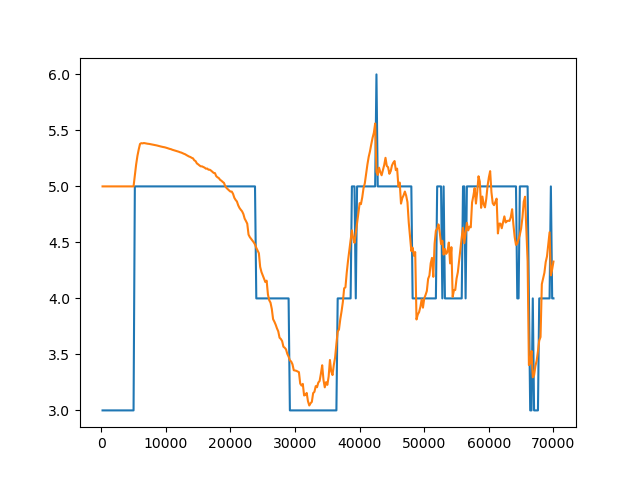

Text(0.5, 1.0, 'STQE: Adjusted Number of Dropped Q-functions')

In [13]:
plt.figure(40)
acc_esf = np.array(acc['env_step'])
acc_dq = np.array(acc['dropped_Q'])
# aqe2_er = np.array(aqe2["episode_reward"])
plt.plot(acc_esf, acc_dq, label = "dropped Q-functions")
# acch_esf = np.array(acch['env_step'])
# acch_dq = np.array(acch['dropped_Q'])
# aqe2_er = np.array(aqe2["episode_reward"])
# plt.plot(acch_esf, acch_dq, label = "acch")
#
# acc_dq = np.array(acc['adjusted_Q_drop'])
# plt.plot(acc_esf, acc_dq, label = "acc")
#
# plt.figure(60)
# acc_esf = np.array(acc['env_step'])
# acc_dq = np.array(acc['dropped_Q'])
acc_aqd = np.array(acc['adjusted_Q_drop'])
plt.plot(acc_esf, acc_aqd, label = "adjusted drop Q num")
pylab.show()
plt.axvline(x = 5000, color = 'r', label = 'end of random exploration')
# plt.title("acc dropped Q over steps")

plt.xlabel("Environment Steps")
plt.ylabel("Dropped Q-functions")
plt.title("STQE: Adjusted Number of Dropped Q-functions")

# yyaxis right
# acc_qret = np.array(acc['normalized_bias']) * -1
# accx = np.array(acc['env_step'])
# plt.plot(accx, acc_qret, color = 'g')
# # plt.xlabel("Environment Steps")
# # plt.ylabel("Normalized Bias")
# plt.axhline(y = 0, color = 'black', linestyle = '-')
# # plt.tick_params(left = False)
# # plt.tick_params(bottom = False)
# # pylab.show()
# # plt.title("Normalized Bias - ACC")
# # ax.gca()
# # ax.invert_yaxis()
# plt.savefig('reverted_bias.png', transparent=True)
# # plt.savefig('reverted_bias')
# pylab.show()

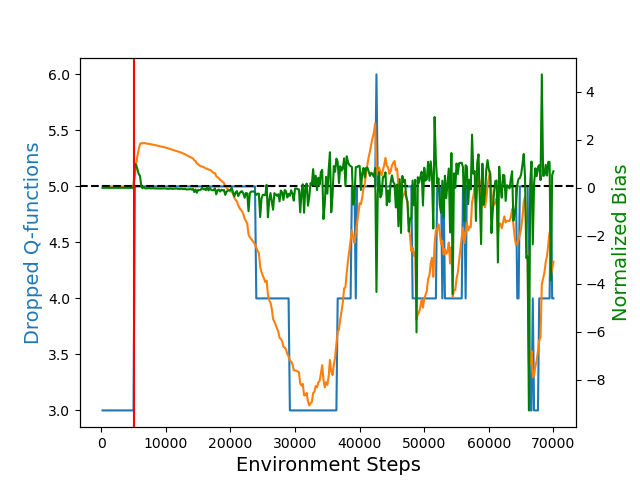

Text(0.5, 1.0, 'STQE: Self-tuning Number of Dropped Q-functions')

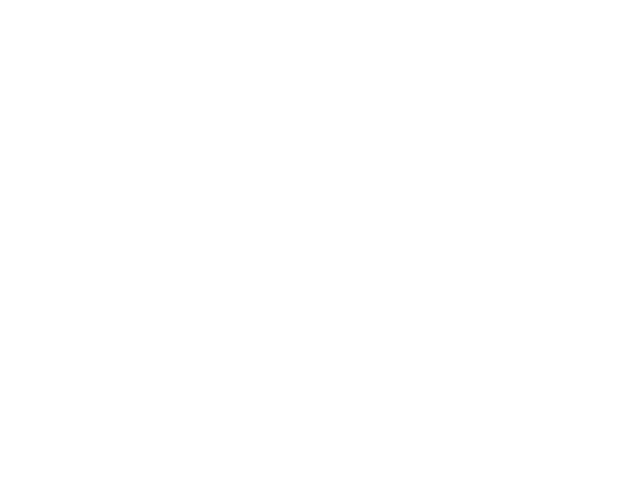

In [14]:
plt.figure(80)
acc_esf = np.array(acc['env_step'])
acc_dq = np.array(acc['dropped_Q'])
acc_aqd = np.array(acc['adjusted_Q_drop'])

# plt.plot(acc_esf, acc_dq, label = "dropped Q-functions")
# plt.plot(acc_esf, acc_aqd, label = "adjusted drop Q num")

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(acc_esf, acc_dq)

ax.plot(acc_esf, acc_aqd, label = "adjusted drop Q num")
ax.axhline(y = 5, color = 'black', linestyle = 'dashed')

# set x-axis label
ax.set_xlabel("Environment Steps", fontsize = 14)
# set y-axis label
ax.set_ylabel("Dropped Q-functions",
              c='C0',
              fontsize=14)



#normalized bias
acc_qret = np.array(acc['normalized_bias']) * -1
# acc.plot(x='env_step', y='normalized_bias', color = 'g')
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(acc_esf, acc_qret, color = 'green')
ax2.set_ylabel("Normalized Bias",color="green",fontsize=14)
# plt.show()
# # save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')
ax2.axvline(x = 5000, color = 'r', label = 'end of random exploration')
# plt.legend(["Normalized Bias", "Start of Training"], loc=3) #, frameon=legend_drawn_flag)

pylab.show()
# fig.legend(["Actual Drop", "Drop Estimate", "Normalized Bias", "Start of Training"], fontsize = 10)
ax.legend(["Actual Drop", "Drop Estimate"], loc=0, fontsize = 10)
ax2.legend(["Normalized Bias", "Start of Training"], loc=3, fontsize = 10)

# plt.title("acc dropped Q over steps")

# plt.xlabel("Environment Steps")
# plt.ylabel("Dropped Q-functions")
plt.title("STQE: Self-tuning Number of Dropped Q-functions", fontsize = 14)

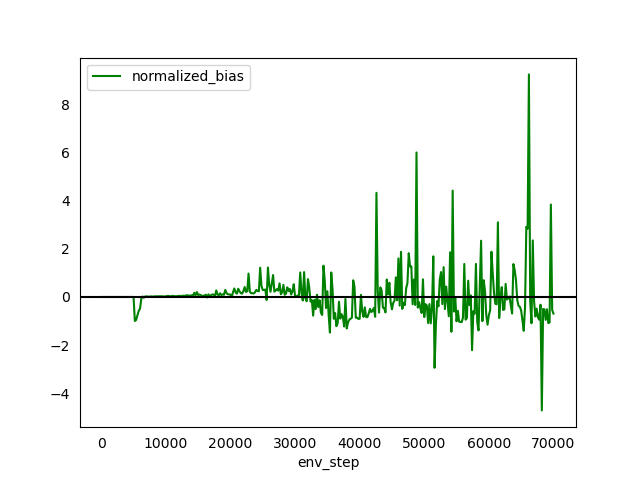

In [15]:
acc_qret = np.array(acc['normalized_bias']) * -1
acc.plot(x='env_step', y='normalized_bias', color = 'g')
# plt.xlabel("Environment Steps")
# plt.ylabel("Normalized Bias")
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.tick_params(left = False)
plt.tick_params(bottom = False)
# pylab.show()
# plt.title("Normalized Bias - ACC")
# ax.gca()
# ax.invert_yaxis()
plt.savefig('reverted_bias.png', transparent=True)
# plt.savefig('reverted_bias')